<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

### Вывод

Первоначальный вид файла оставлял желать лучшего, поэтому пришлось применить дополнительные параметры `sep` и `decimal` , для того, чтобы создать красивую и понятную таблицу.

Методом `info()` получаем информацию о файле. У нас есть несколько типов данных (object, int64, bool). 22 колонки и 23699 строк. Встречаются пропуски.

Названия колонок:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## Предобработка данных

In [3]:
#посмотрим количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Огромное количество пропущенных значений. 

Колонка `ceiling_height` - высота потолков. Заменить такое значение на 0 нельзя. Но мы можем применить одну хитрость. В среднем высота потолком в одном регионе (городе, поселке...) будет одинаковая, поэтому создадим функцию, назовем ее "по региону".

`floors_total` - всего этажей в доме. Значение, которое не начто заменить. Применим функцию "по региону"

`living_area` - жилая площадь. Тоже полностью не известное число. Применим функцию "по региону"

`is_apartment` - апартаменты. Эта колонка состоит из булевых значений. Отсутствие значения может равняться False. Стоит проверить, какие значения есть в колонке.

`kitchen_area` - площадь кухни. Отсутствие значенийзаменить невозможно. Применим функцию "по региону"

`balcony` - число балконов. Отсутствие значений, скорее всего, говорит об отсутствии балконов впринципе. Можно заменить пропуски на 0.

`locality_name` - название населенного пункта. Заменить не на что. Такие пропуски возможно из-за человеческого фактора, то есть невнимательлности при заполнении данных. Их число не велико, удалим эти строки. 

`airports_nearest` - расстояние до ближайшего аэропорта. Применим функцию "по региону"

`cityCenters_nearest` - расстояние до центра города. Аналогично расстоянию до аэропорта. 

`parks_around3000` - число парков в радиусе 3км. Применим функцию "по региону"

`parks_nearest` - расстояние до ближайшего парка. Здесь можно поступить как и с прошлыми расстояниями.

`ponds_around3000` - число водоемов. Аналогично паркам.

`ponds_nearest` - расстояние до водоемов. Все так же, как и с другим расстояниями. 

`days_exposition` - дней размещения объявления. Возможно пропуски появились из-за новизны объявлений. Можно заменить пропуски на 0, но думаю чуть позжедетально изучим этот столбец. 

In [4]:
#посмотрим долюпропущенных значений
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [5]:
#заменим значения на 0
data['balcony'] = data['balcony'].fillna(0)

#проверим пропуски теперь
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**is_apartment**

In [6]:
#проверим колонку с аппартаментами
display(data['is_apartment'].value_counts())

data['is_apartment'].unique()

False    2725
True       50
Name: is_apartment, dtype: int64

array([nan, False, True], dtype=object)

Оказывается значения и True и False встречаются. Предлагаю nan заменить на False, чтобы можно было работать с колонкой. Но пропущенных значений очень много.

In [7]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

 **airports_nearest**

In [8]:
#проверим колонку airports_nearest
data['airports_nearest'].value_counts()

37434.0    61
21928.0    32
44870.0    30
39946.0    30
37407.0    27
           ..
41831.0     1
49205.0     1
35924.0     1
33482.0     1
22001.0     1
Name: airports_nearest, Length: 8275, dtype: int64

Напомню, что расстояние считается в метрах. 

In [9]:
#заменим тип данных на числовой, так работать с данными будет легче
data['airports_nearest'] = data['airports_nearest'].astype('str')
data['airports_nearest'] = data['airports_nearest'].astype('float')
data['airports_nearest'].value_counts()

37434.0    61
21928.0    32
39946.0    30
44870.0    30
18732.0    27
           ..
53478.0     1
20335.0     1
33699.0     1
26945.0     1
20875.0     1
Name: airports_nearest, Length: 8275, dtype: int64

In [10]:
#теперь сократим количество цифр, переведем в километры, так нагляднее
data['airports_nearest']/=1000
data['airports_nearest'].value_counts()

37.434    61
21.928    32
39.946    30
44.870    30
37.407    27
          ..
25.808     1
40.965     1
16.559     1
13.006     1
0.000      1
Name: airports_nearest, Length: 8275, dtype: int64

In [11]:
display(data['airports_nearest'].isna().sum())
display(data['airports_nearest'].isna().mean()*100)

5542

23.384952951601335

Пропусков 5542, что составляет 23% от всех строк. Это большое количество пустых значений. Поэтому растояние до ближайшего аэропорта придется заполнять. 

Сделаем это с помощью одного способа. Сгруппируем таблицу по населенным пунктам, посчитаем в этих пунктах среднее расстояние до аэропорта и заполним этим числом пропуски.

In [12]:
for city in data['locality_name'].unique():
    temp = data[data['locality_name'] == city]
    agg = temp['airports_nearest'].mean()
    data.loc[data['locality_name'] == city, 'airports_nearest'] = data[data['locality_name'] == city]['airports_nearest'].fillna(agg)
    
data['airports_nearest'].isna().sum()

5394

In [13]:
display(data['airports_nearest'].max())
display(data['airports_nearest'].min())
display(data['airports_nearest'].median())
display(data['airports_nearest'].mean())

84.869

0.0

26.852

28.869811211748228

In [14]:
#среднее и медиана почти равны, поэтому остальные пропуски заменим средним числом
data['airports_nearest'] = data['airports_nearest'].fillna(28.8)
data['airports_nearest'].isna().sum()

0

**locality_name**

In [15]:
#посмотрим столбец с названиями населеных пунктов
data['locality_name'].value_counts()

Санкт-Петербург           15721
посёлок Мурино              522
посёлок Шушары              440
Всеволожск                  398
Пушкин                      369
                          ...  
поселок Гладкое               1
деревня Шпаньково             1
деревня Ялгино                1
посёлок Плоское               1
поселок Красносельское        1
Name: locality_name, Length: 364, dtype: int64

In [16]:
len(data['locality_name'].unique())

365

Чаще всего встречается Санкт-Петербург. Пропусков в этом столбце всего 49. уникальных значений - 365. Заменить пропуски ни на что мы не можем. Поэтому вместо пропусков напишем "Неизвестно"


In [17]:
data['locality_name']=data['locality_name'].fillna('Неизвестно')
data['locality_name'].isna().sum()

0

**ceiling_height**

In [18]:
#проверяем ceiling_height
display(data['ceiling_height'].value_counts())
display(data['ceiling_height'].isna().sum())

2.5     3515
2.6     1646
2.7     1574
3.0     1112
2.8      993
        ... 
5.8        1
4.3        1
4.25       1
2.49       1
5.0        1
Name: ceiling_height, Length: 183, dtype: int64

9195

Самая популярная высота - 2,5 метра. Но заменить пропуски на это значение было бы не правильно. 

In [19]:
#заменим пропуски временно на 2,5
data['ceiling_height'] = data['ceiling_height'].fillna(2.5)
data['ceiling_height'] = data['ceiling_height'].astype('float')
    
data['ceiling_height'].value_counts()

2.50     12710
2.60      1646
2.70      1574
3.00      1112
2.80       993
         ...  
4.25         1
3.39         1
3.93         1
10.30        1
4.65         1
Name: ceiling_height, Length: 183, dtype: int64

In [20]:

data['ceiling_height'].loc[data['ceiling_height'] > 10]

#посмотрим какие значения больше 10 метров

355       25.0
3148      32.0
4643      25.0
4876      27.0
5076      24.0
5246      27.0
5669      26.0
5807      27.0
6246      25.0
9379      25.0
10773     27.0
11285     25.0
14382     25.0
15061     14.0
17496     20.0
17857     27.0
18545     25.0
20478     27.0
20507     22.6
21377     27.5
21824     27.0
22309     10.3
22336     32.0
22869    100.0
22938     27.0
Name: ceiling_height, dtype: float64

In [21]:
wrong = []
for number in data['ceiling_height']:
    if number > 10:
        wrong.append(number)
        
for value in wrong:
    data.loc[data['ceiling_height'] == value, 'ceiling_height'] = value/10
data['ceiling_height'].unique()

array([ 2.7 ,  2.5 ,  3.03,  2.67,  2.56,  3.05,  2.75,  2.6 ,  2.9 ,
        2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

**parks_nearest**

In [22]:
#проверяем следующий столбец
data['parks_nearest'].isna().sum()

15620

In [23]:
#меняем тип данных
data['parks_nearest'] = data['parks_nearest'].astype('float')

In [24]:
#с помощью функции заполняем пропуски
for city in data['locality_name'].unique():
    temp = data[data['locality_name'] == city]
    agg = temp['parks_nearest'].mean()
    data.loc[data['locality_name'] == city, 'parks_nearest'] = data['parks_nearest'].fillna(agg)
    
data['parks_nearest'].isna().sum()

5998

In [25]:
display(data['parks_nearest'].mean())
display(data['parks_nearest'].median())
display(data['parks_nearest'].max())

492.20342735128975

498.5978857770456

3190.0

In [26]:
#остальные пропуски заполним числом 500
data['parks_nearest'] = data['parks_nearest'].fillna(500)
data['parks_nearest'].isna().sum()

0

In [27]:
#Проверим сколько соталось пропусков и где
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest               0
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**floors_total**

In [28]:
#количество пропусков маленькое, можем просто удалить эти строки
data=data.dropna(subset = ['floors_total'])
data['floors_total'].isna().sum()


0

**living_area**

In [29]:
display(data['living_area'].isna().sum())
display(data['living_area'].isna().mean()*100)

1870

7.919366450683945

In [30]:
data['living_area'] = data['living_area'].astype('float')
for city in data['locality_name'].unique():
    temp = data[data['locality_name'] == city]
    agg = temp['living_area'].mean()
    data.loc[data['locality_name'] == city, 'living_area'] = data[data['locality_name'] == city]['living_area'].fillna(agg)
    
data['living_area'].isna().sum()

17

In [31]:
data['living_area'].median()

30.831666666666663

In [32]:
#оставшиеся 17 пропусков заменим на медиану
data['living_area'] = data['living_area'].fillna(30)
data['living_area'].isna().sum()

0

**kitchen_area**

In [33]:
display(data['kitchen_area'].isna().sum())
display(data['kitchen_area'].isna().mean()*100)

2231

9.448185321644857

In [34]:
data['kitchen_area'] = data['kitchen_area'].astype('float')
for city in data['locality_name'].unique():
    temp = data[data['locality_name'] == city]
    agg = temp['kitchen_area'].mean()
    data.loc[data['locality_name'] == city, 'kitchen_area'] = data[data['locality_name'] == city]['kitchen_area'].fillna(agg)
    
data['kitchen_area'].isna().sum()

19

In [35]:
data['kitchen_area'].mean()

10.560827058500996

In [36]:
#оставшиеся 19 пропусков заменим на медиану
data['kitchen_area'] = data['kitchen_area'].fillna(10)
data['kitchen_area'].isna().sum()

0

**cityCenters_nearest**

In [37]:
display(data['cityCenters_nearest'].isna().sum())
display(data['cityCenters_nearest'].isna().mean()*100)

5509

23.330368864608477

In [38]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('float')
for city in data['locality_name'].unique():
    temp = data[data['locality_name'] == city]
    agg = temp['cityCenters_nearest'].mean()
    data.loc[data['locality_name'] == city, 'cityCenters_nearest'] = data[data['locality_name'] == city]['cityCenters_nearest'].fillna(agg)
    
data['cityCenters_nearest'].isna().sum()

5432

In [39]:
#здесь функция не смогла заменить большинсво пропусков, поэтому пока оставим их пустыми и обозначим как "-1"
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)
data['cityCenters_nearest'].isna().sum()

0

**ponds_nearest**

In [40]:
display(data['ponds_nearest'].isna().sum())
display(data['ponds_nearest'].isna().mean()*100)

14552

61.62706983441325

In [41]:
data['ponds_nearest'] = data['ponds_nearest'].astype('float')
for city in data['locality_name'].unique():
    temp = data[data['locality_name'] == city]
    agg = temp['ponds_nearest'].mean()
    data.loc[data['locality_name'] == city, 'ponds_nearest'] = data[data['locality_name'] == city]['ponds_nearest'].fillna(agg)
    
data['ponds_nearest'].isna().sum()

5517

In [42]:
data['ponds_nearest'].median()

520.391129032258

In [43]:
#здесь функция не смогла заменить большинсво пропусков, поэтому заменим на медиану
data['ponds_nearest'] = data['ponds_nearest'].fillna(520)
data['ponds_nearest'].isna().sum()

0

In [44]:
#Проверим сколько соталось пропусков и где
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000        5508
parks_nearest              0
ponds_around3000        5508
ponds_nearest              0
days_exposition         3172
dtype: int64

**parks_around3000**

In [45]:
display(data['parks_around3000'].isna().sum())
display(data['parks_around3000'].isna().mean()*100)

5508

23.326133909287257

In [46]:
data['parks_around3000'] = data['parks_around3000'].astype('float')

for city in data['locality_name'].unique():
    temp = data[data['locality_name'] == city]
    agg = temp['parks_around3000'].mean()
    data.loc[data['locality_name'] == city, 'parks_around3000'] = data[data['locality_name'] == city]['parks_around3000'].fillna(agg)
    
data['parks_around3000'].isna().sum()

5432

In [47]:
data['parks_around3000'].value_counts()

0.000000    10067
1.000000     5657
2.000000     1739
3.000000      645
0.627606       60
0.550000        8
0.482759        2
1.789474        1
0.522255        1
0.242424        1
Name: parks_around3000, dtype: int64

In [48]:
data['parks_around3000'].mean()

0.611384192869323

In [49]:
#здесь функция не смогла заменить большинсво пропусков, поэтому заменим на 1
data['parks_around3000'] = data['parks_around3000'].fillna(1)
data['parks_around3000'].isna().sum()

0

In [50]:
data['parks_around3000'].value_counts()

1.000000    11089
0.000000    10067
2.000000     1739
3.000000      645
0.627606       60
0.550000        8
0.482759        2
1.789474        1
0.522255        1
0.242424        1
Name: parks_around3000, dtype: int64

In [51]:
#округлим значения, не может быть количество парков состоять из нецелого числа. 
data['parks_around3000'] = data['parks_around3000'].round()
data['parks_around3000'].value_counts()

1.0    11158
0.0    10070
2.0     1740
3.0      645
Name: parks_around3000, dtype: int64

**ponds_around3000**

In [52]:
display(data['ponds_around3000'].isna().sum())
display(data['ponds_around3000'].isna().mean()*100)

5508

23.326133909287257

In [53]:
data['ponds_around3000'] = data['ponds_around3000'].astype('float')

for city in data['locality_name'].unique():
    temp = data[data['locality_name'] == city]
    agg = temp['ponds_around3000'].mean()
    data.loc[data['locality_name'] == city, 'ponds_around3000'] = data[data['locality_name'] == city]['ponds_around3000'].fillna(agg)
    
data['ponds_around3000'].isna().sum()

5432

In [54]:
data['ponds_around3000'].value_counts()

0.000000    9044
1.000000    5677
2.000000    1886
3.000000    1498
0.770188      60
1.050000       8
0.348624       3
0.091954       2
1.128788       1
0.997033       1
1.936842       1
Name: ponds_around3000, dtype: int64

In [55]:
data['ponds_around3000'].mean().round()

1.0

In [56]:
#функция не смогла заменить большинсво пропусков, поэтому заменим на 1
data['ponds_around3000'] = data['ponds_around3000'].fillna(1)
data['ponds_around3000'].isna().sum()

0

In [57]:
#округлим значения, не может быть количество парков состоять из нецелого числа. 
data['ponds_around3000'] = data['ponds_around3000'].round()
data['ponds_around3000'].value_counts()

1.0    11179
0.0     9049
2.0     1887
3.0     1498
Name: ponds_around3000, dtype: int64

**days_exposition**

In [58]:
data['days_exposition'].isna().sum()

3172

In [59]:
data['days_exposition'].value_counts()

45.00000000000001    880
60.0                 538
7.0                  234
30.0                 208
90.00000000000001    201
                    ... 
1133.0                 1
1045.0                 1
1312.0                 1
1315.0                 1
985.0                  1
Name: days_exposition, Length: 1139, dtype: int64

In [60]:
data['days_exposition'] = data['days_exposition'].astype('float')
data['days_exposition'] = data['days_exposition'].round()
data['days_exposition'].head(10)

0      NaN
1     81.0
2    558.0
3    424.0
4    121.0
5     55.0
6    155.0
7      NaN
8    189.0
9    289.0
Name: days_exposition, dtype: float64

Мы видим, что самое популярное число дней, в течении которых размещено объявление - 45 и 60. Но встречаются и большие цифры. Сложно предугадать, какое число должно быть на месте пропусков. 

In [61]:
data[data['days_exposition'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,25.000000,0,Санкт-Петербург,18.863,16028.0,1.0,482.000000,2.0,755.000000,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.50,24.0,36.976588,22,False,...,18.900000,2.0,Санкт-Петербург,23.982,11634.0,0.0,498.597886,0.0,520.391129,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.50,22.0,36.976588,3,False,...,11.148582,1.0,Санкт-Петербург,30.471,11603.0,1.0,620.000000,1.0,1152.000000,NaN
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.300000,7,False,...,7.000000,0,Санкт-Петербург,30.011,12872.0,0.0,498.597886,0.0,520.391129,NaN
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.700000,9,False,...,8.300000,2.0,Санкт-Петербург,15.114,12702.0,0.0,498.597886,0.0,520.391129,NaN


Вот например первые пять строк с пропусками. Мы видим, что дата публикации достаточно старая. Скорее всего забыли снять объявление с продажи. Поэтому заменим пропуски на значение 50

In [62]:
data_0 = data

In [63]:
data['days_exposition'] = data['days_exposition'].fillna(50)
data['days_exposition'].isna().sum()

0

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  object 
 2   total_area            23613 non-null  object 
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  object 
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  object 
 14  locality_name         23613 non-null  object 
 15  airports_nearest   

In [65]:
#меняем форматы
data['total_area'] = data['total_area'].astype('float')
data['last_price'] = data['last_price'].astype('float')
data['floors_total'] = data['floors_total'].astype('float')

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

**ВЫВОД "Предобработка данных**

Первую подготовку данных провели. Теперь таблица без пропусков, все данные красивые и в нужных форматах. Найдены все выбивающиеся значения. С данными можно дальше работать


## Расчёты и добавление результатов в таблицу

**Цена квадратного метра**

Для подсчета этого значения, необходимо цену разделить на кол-во квадратных метро в квартире

In [66]:
data['price_metr'] = data['last_price']/data['total_area']
data['price_metr'] = data['price_metr'].round(3)
data['price_metr'].head()

0    120370.370
1     82920.792
2     92785.714
3    408176.101
4    100000.000
Name: price_metr, dtype: float64

**Этаж квартиры; варианты — первый, последний, другой**

In [67]:
def flo (row):
    last = row['floors_total']   
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == last:
        return 'последний'
    else:
         return 'другой'
      
data['floor_group'] = data.apply(flo, axis=1)
data['floor_group'].value_counts()

другой       17363
последний     3336
первый        2914
Name: floor_group, dtype: int64

**День недели, месяц и год публикации объявления**

In [68]:
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [69]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['weekday'].head()

0    3
1    1
2    3
3    4
4    1
Name: weekday, dtype: int64

In [70]:
data['year'] = data['first_day_exposition'].dt.year
data['year'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int64

In [71]:
data['month'] = data['first_day_exposition'].dt.month
data['month'].head()

0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int64

**Cоотношение жилой и общей площади, а также отношение площади кухни к общей**

Создадим два столбца, в которых посчитаем отношение величин 

In [72]:
data['living_total'] = data['living_area'] / data['total_area']
data['kitchen_total'] = data['kitchen_area'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_metr,floor_group,weekday,year,month,living_total,kitchen_total
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,2.0,755.000000,50.0,120370.370,другой,3,2019,3,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.50,11.0,18.600000,1,False,...,0.0,573.217105,81.0,82920.792,первый,1,2018,12,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.50,5.0,34.300000,4,False,...,2.0,574.000000,558.0,92785.714,другой,3,2015,8,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.50,14.0,36.976588,9,False,...,3.0,234.000000,424.0,408176.101,другой,4,2015,7,0.232557,0.070117
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,1.0,48.000000,121.0,100000.000,другой,1,2018,6,0.320000,0.410000


## Исследовательский анализ данных

Площадь, цена, число комнат, высота потолков. Строим гистограммы для каждого параметра.

In [73]:
data['total_area'].max()

900.0

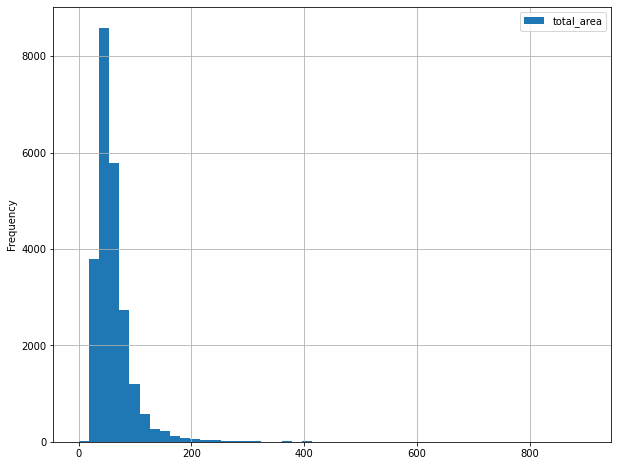

In [74]:
#площадь
data.plot(kind='hist', y='total_area', grid=True, bins=50, range=(0,900), figsize=(10,8));

Площадь квартир различается, встречаются даже квартиры с площадь более 400, но есть популярные значения: в диапазоне от 50 до 100 метров. 

In [75]:
data['last_price'].max()

763000000.0

In [76]:
data['last_price'].value_counts()

4500000.0     341
3500000.0     291
4300000.0     260
4000000.0     260
4200000.0     259
             ... 
86738800.0      1
10430000.0      1
9917600.0       1
3180500.0       1
4386000.0       1
Name: last_price, Length: 2939, dtype: int64

<AxesSubplot:ylabel='Frequency'>

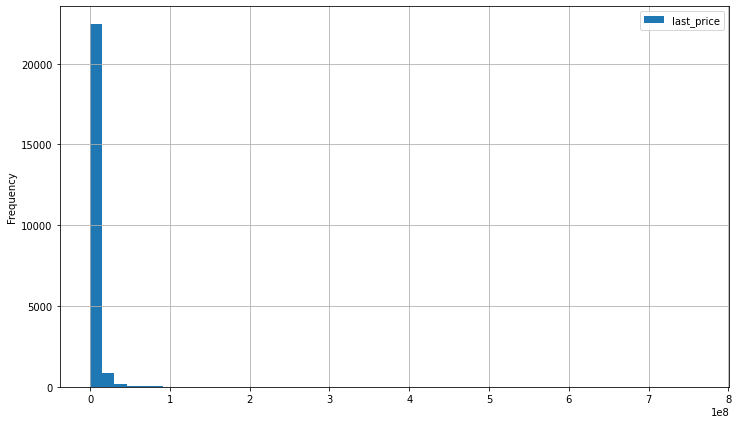

In [77]:
#цена
data.plot(kind='hist', y='last_price', grid=True, bins=50, range=(0,763000000), figsize=(12,7))

Цена на квартиры практически у большинства в районе 3-5 млн. 

In [78]:
data['rooms'].max()

19

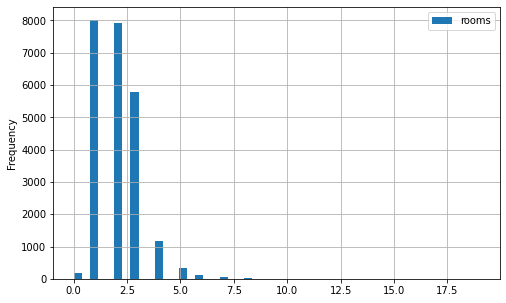

In [79]:
#комнаты
data.plot(kind='hist', y='rooms', grid=True, bins=50, range=(0,19), figsize=(8,5));

Самое большое количество комнат - 19. Но все таки чаще всего покупают квартиры с 1-2 комнатами. 

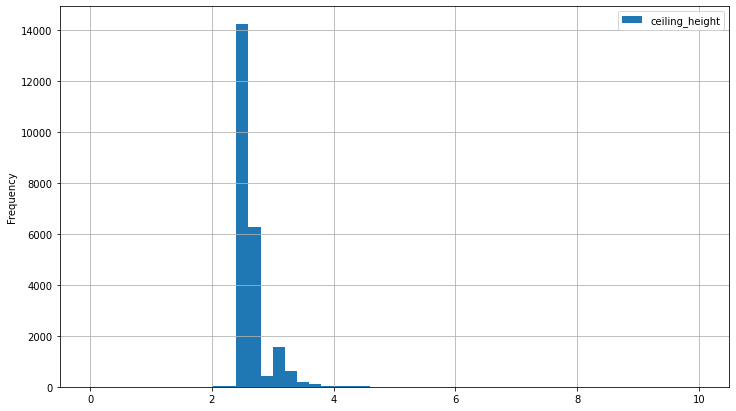

In [80]:
#потолки
data.plot(kind='hist', y='ceiling_height', grid=True, bins=50, range=(0,10), figsize=(12,7));

Выбивается значение 2.5 - это наши пропуски добавились в столбец. Но все же 2.5-3 метра самая популярная высота потолков

___________

**Задача**: Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

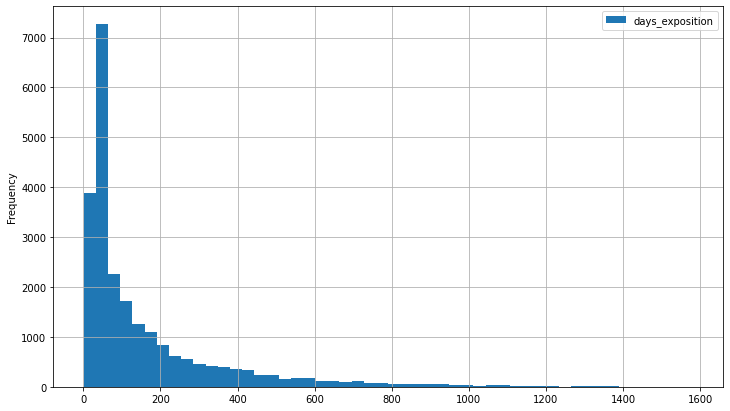

In [81]:
data.plot(kind='hist', y='days_exposition', grid=True, bins=50, figsize=(12,7));

In [82]:
display('Медиана', data['days_exposition'].median())
display('')
display('Среднее', data['days_exposition'].mean())
display('')
display('Максимум', data['days_exposition'].max())
display('')
display('Минимум', data['days_exposition'].min())

'Медиана'

73.0

''

'Среднее'

163.3027146063609

''

'Максимум'

1580.0

''

'Минимум'

1.0

<AxesSubplot:>

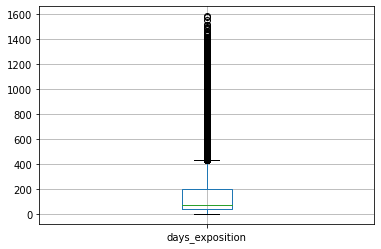

In [83]:
import matplotlib.pyplot as plt
data['days_exposition'] = data['days_exposition'].astype('int')
data.boxplot('days_exposition')

In [84]:
data['days_exposition'].describe()

count    23613.000000
mean       163.302715
std        209.214045
min          1.000000
25%         45.000000
50%         73.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [85]:
data['days_exposition'].value_counts().head(10)

50    3233
45     880
60     538
7      234
30     208
90     201
4      176
3      157
5      152
14     147
Name: days_exposition, dtype: int64

Можем сделать вывод, что обычно продажа занимает от 45 до 60 дней. Быстрой продажей можно считать те случаи, когда удалось закрыть продажу за 1-7 дней. Долгая продажа - от 200 дней и больше. Считаю, что значения в таблице более 730 (а это 2 года) ошибочными. Могли забыть вовремя закрыть продажу. Поэтому такие значения предлагаю сократить до 900 (2,5 года). 

<AxesSubplot:>

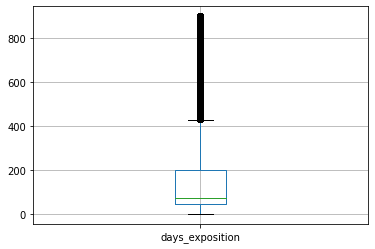

In [86]:
wrong = []
for number in data['days_exposition']:
    if number > 900:
        wrong.append(number)
        
for value in wrong:
    data.loc[data['days_exposition'] == value, 'days_exposition'] = 900
data.boxplot('days_exposition')

In [87]:
data['days_exposition'].describe()

count    23613.000000
mean       159.905433
std        194.133668
min          1.000000
25%         45.000000
50%         73.000000
75%        199.000000
max        900.000000
Name: days_exposition, dtype: float64

Значения не сильно отличаются от первоначальных, поэтому считаю данные неискаженные. Зато значений стало меньше.

In [88]:
#проверим столбец с площадью
data['total_area'].describe()

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

In [89]:
data['living_area'].describe()

count    23613.000000
mean        34.421917
std         21.205705
min          2.000000
25%         19.000000
50%         30.800000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

А вот и странное значение: 2кв.м - жилая площадь.
Посмотрим что это за столбец и исправим его, скорее всего опечатка

In [90]:
data.loc[data['living_area']==2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_metr,floor_group,weekday,year,month,living_total,kitchen_total
13915,20,6350000.0,52.0,2018-02-06,2,3.0,6.0,2.0,2,False,...,1.0,1012.0,91,122115.385,другой,1,2018,2,0.038462,0.173077
21758,0,2330000.0,23.0,2018-01-01,0,2.5,24.0,2.0,22,False,...,1.0,520.0,66,101304.348,другой,0,2018,1,0.086957,0.479902


In [91]:
data['living_area'][13915] = 20.0
data['living_area'][13915]

/tmp/ipykernel_85/77969073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['living_area'][13915] = 20.0


20.0

In [92]:
data['last_price'].describe().round()

count        23613.0
mean       6540555.0
std       10901723.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6799000.0
max      763000000.0
Name: last_price, dtype: float64

In [93]:
data.loc[data['last_price']==12190.0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_metr,floor_group,weekday,year,month,living_total,kitchen_total
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,...,0.0,520.391129,8,111.835,последний,2,2019,3,0.293578,0.37156


Подозрительно низкая цена для квартиры площадью 109 квадратов. Забыли нолик в конце. Думаю можно умножить эту цену на 0 

In [94]:
data['last_price'][8793] = data['last_price'][8793]*10
data['last_price'][8793]

/tmp/ipykernel_85/2504919243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_price'][8793] = data['last_price'][8793]*10


121900.0

_______________________________________

**Задача:** Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [95]:
#создадим таблицу, куда поместим 4 столбца: цена, площадь, число комнат, удалённость от центра.
data_price_group = data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
data_price_group.head()

,last_price,total_area,rooms,cityCenters_nearest
0,13000000.0,108.0,3,16028.0
1,3350000.0,40.4,1,18603.0
2,5196000.0,56.0,2,13933.0
3,64900000.0,159.0,3,6800.0
4,10000000.0,100.0,2,8098.0


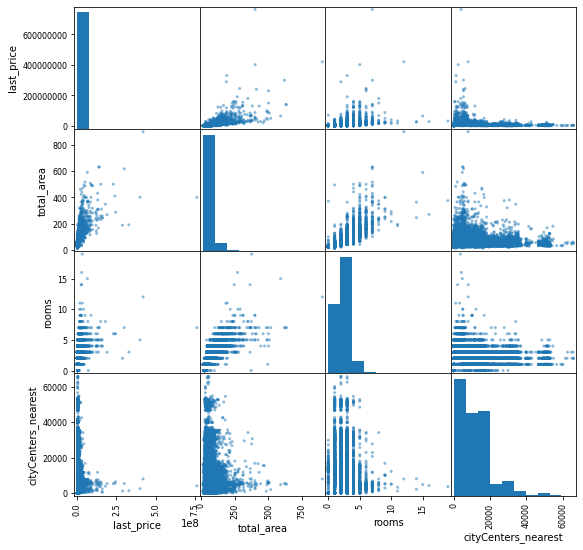

In [96]:
pd.plotting.scatter_matrix(data_price_group, figsize=(9,9));

In [97]:
data_price_group.corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.653582,0.363124,-0.048363
total_area,0.653582,1.000000,0.758324,-0.074803
rooms,0.363124,0.758324,1.000000,-0.059851
cityCenters_nearest,-0.048363,-0.074803,-0.059851,1.000000


Благодаря коэффициенту корреляции Пирсона, можем сделать вывод:

**Зависимость цены от площади:** равно 0,65. Число положительное, ближе к единице. Говорит о том, что цена зависит от площади. С ростом площади растет и цена.
**Зависимость цены от количества комнат:** равно 0,36. Число положительное, ближе к нулю. Говорит о том, что цена зависит от количества комнат, но не сильно. С ростом количества комнат цена растет медленно. Связь слабая.
**Зависимость цены от удаленности от центра:** равно -0,04. Число отрицательное, ближе к нулю. Говорит о том, что цена не зависит от удаленности. С увеличением удаленности от центра цена снижается, при этом практически нет взаимосвязи. 

__________

In [98]:
#создадим еще одну таблицу для сравнения
data_price_group_2 = data[['last_price', 'floor_group', 'weekday', 'month', 'year']]
data_price_group_2.head()

,last_price,floor_group,weekday,month,year
0,13000000.0,другой,3,3,2019
1,3350000.0,первый,1,12,2018
2,5196000.0,другой,3,8,2015
3,64900000.0,другой,4,7,2015
4,10000000.0,другой,1,6,2018


In [99]:
#группируем по этажам
group = data_price_group_2.groupby('floor_group')['last_price'].median()
group.head()

floor_group
другой       4850000.0
первый       3900000.0
последний    4300000.0
Name: last_price, dtype: float64

<AxesSubplot:xlabel='floor_group'>

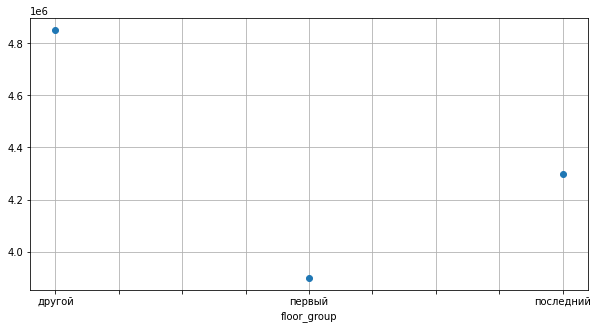

In [100]:
group.plot(x='floor_group', 
                                                      y='last_price', 
                                                      grid=True, 
                                                      style='o', 
                                                      figsize=(10,5),
                                                      )


Мы сделали группировку по этажам и нашли медиану. Наименьшая цена на первом этаже, наивысшая на другом. Последний этаж - средняя цена.

In [101]:
#группируем по дням недели
group_2 = data_price_group_2.groupby('weekday')['last_price'].median()
group_2.head(7)

weekday
0    4650000.0
1    4725000.0
2    4700000.0
3    4650000.0
4    4577500.0
5    4550000.0
6    4540000.0
Name: last_price, dtype: float64

<AxesSubplot:xlabel='weekday'>

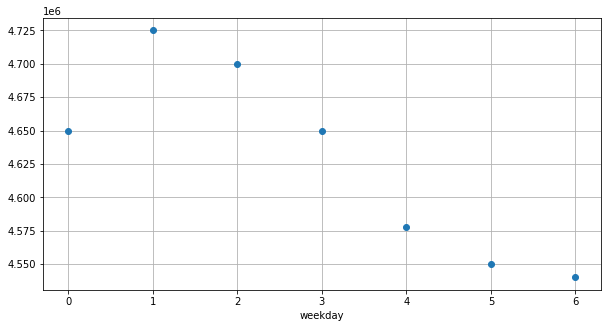

In [102]:
group_2.plot(x='weekday', 
             y='last_price', 
             grid=True, 
             style='o', 
             figsize=(10,5),
             )


Аналогично прошлому решению, создали группировку. 

Самая высокая цена - публикация во вторник, наименьшая - в воскресенье. 

In [103]:
#группируем по месяцам
group_3 = data_price_group_2.groupby('month')['last_price'].median()
group_3.head(12)

month
1     4600000.0
2     4650000.0
3     4650000.0
4     4800000.0
5     4500000.0
6     4400000.0
7     4650000.0
8     4570000.0
9     4700000.0
10    4570000.0
11    4700000.0
12    4700000.0
Name: last_price, dtype: float64

<AxesSubplot:xlabel='month'>

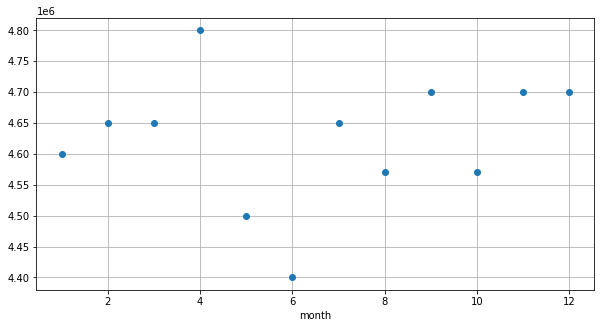

In [104]:
group_3.plot(x='month', 
             y='last_price', 
             grid=True, 
             style='o', 
             figsize=(10,5),
             )

Наивысшая цена - публикация в апреле, наименьшая - июнь.

In [105]:
#группируем по годам
group_4 = data_price_group_2.groupby('year')['last_price'].median()
group_4.head(6)

year
2014    7700000.0
2015    5312500.0
2016    4550000.0
2017    4500000.0
2018    4550000.0
2019    5050000.0
Name: last_price, dtype: float64

<AxesSubplot:xlabel='year'>

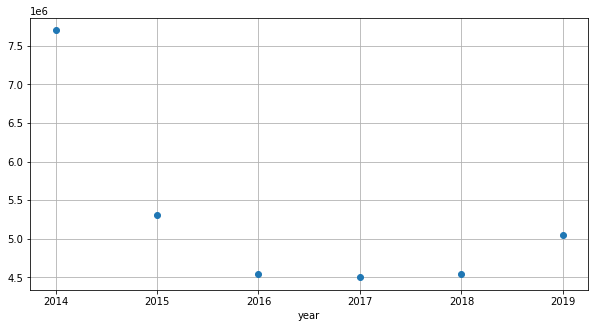

In [106]:
group_4.plot(x='year', 
             y='last_price', 
             grid=True, 
             style='o', 
             figsize=(10,5),
             )

Наудивление самая большая цена в 2014 году. А наименьшая - 2016-2018 года. Рынок недвижимости сильно просел в 2016 году, а в 2019 не сильно "очухался", цена до уровня 2014 года не поднялась. 

______

**Задача:** Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name

In [107]:
city_group = data.pivot_table(index='locality_name', values='price_metr', aggfunc=('count', 'mean')).astype('int')
city_group.head()

,count,mean
locality_name,,
Бокситогорск,16,17551
Волосово,36,40183
Волхов,111,35087
Всеволожск,398,68654
Выборг,237,58141


In [108]:
ten_city = city_group.sort_values(by='count', ascending=False).reset_index().head(10)
ten_city

,locality_name,count,mean
0,Санкт-Петербург,15651,114868
1,посёлок Мурино,520,85673
2,посёлок Шушары,439,78551
3,Всеволожск,398,68654
4,Пушкин,369,103125
5,Колпино,338,75424
6,посёлок Парголово,327,90175
7,Гатчина,307,68746
8,деревня Кудрово,299,92473
9,Выборг,237,58141


<AxesSubplot:xlabel='locality_name'>

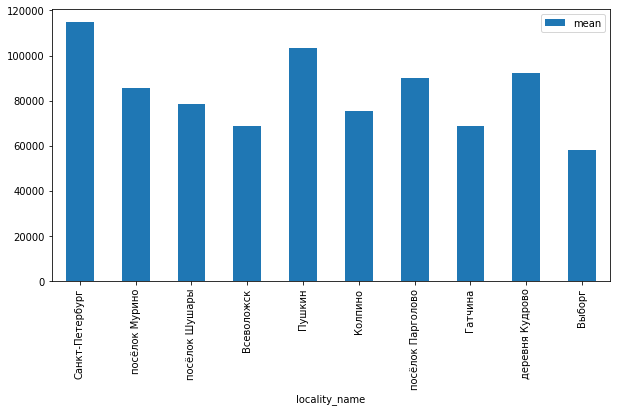

In [109]:
ten_city.plot(x='locality_name', y='mean', kind='bar', figsize=(10,5))

In [110]:
ten_city.sort_values(by='mean', ascending=False)

,locality_name,count,mean
0,Санкт-Петербург,15651,114868
4,Пушкин,369,103125
8,деревня Кудрово,299,92473
6,посёлок Парголово,327,90175
1,посёлок Мурино,520,85673
2,посёлок Шушары,439,78551
5,Колпино,338,75424
7,Гатчина,307,68746
3,Всеволожск,398,68654
9,Выборг,237,58141


Самая высокая цена - Санкт-Петербург = 114868 за метр

Низкая - Выборг = 58141 за метр

________

**Задача:** Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [111]:
data['centr_km'] = data['cityCenters_nearest']/1000 
data['centr_km'] = data['centr_km'].round()
data['price_km'] = data['last_price'] / data['centr_km']
data['price_km'] = data['price_km'].round()
data['price_km'] = data['price_km'].astype('float')
data['centr_km'] = data['centr_km'].astype('float')
data['centr_km'] = data['centr_km'].astype('int')
piter = data.query('locality_name == "Санкт-Петербург"')
piter.head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_metr,floor_group,weekday,year,month,living_total,kitchen_total,centr_km,price_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,50,120370.370,другой,3,2019,3,0.472222,0.231481,16,812500.0
2,10,5196000.0,56.0,2015-08-20,2,2.50,5.0,34.300000,4,False,...,558,92785.714,другой,3,2015,8,0.612500,0.148214,14,371143.0
3,0,64900000.0,159.0,2015-07-24,3,2.50,14.0,36.976588,9,False,...,424,408176.101,другой,4,2015,7,0.232557,0.070117,7,9271429.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,121,100000.000,другой,1,2018,6,0.320000,0.410000,8,1250000.0
7,5,7915000.0,71.6,2019-04-18,2,2.50,24.0,36.976588,22,False,...,50,110544.693,другой,3,2019,4,0.516433,0.263966,12,659583.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.600000,7,False,...,289,88524.590,другой,6,2017,2,0.714754,0.106557,15,360000.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12.0,20.300000,3,False,...,137,127525.253,другой,3,2017,11,0.512626,0.214646,14,360714.0
15,16,4650000.0,39.0,2017-11-18,1,2.50,14.0,20.500000,5,False,...,19,119230.769,другой,5,2017,11,0.525641,0.194872,14,332143.0
16,11,6700000.0,82.0,2017-11-23,3,3.05,5.0,55.600000,1,False,...,397,81707.317,первый,3,2017,11,0.678049,0.109756,11,609091.0
17,6,4180000.0,36.0,2016-09-09,1,2.50,17.0,16.500000,7,False,...,571,116111.111,другой,4,2016,9,0.458333,0.305556,15,278667.0


In [112]:
piter.groupby('centr_km')['price_km'].mean().round()

centr_km
0            inf
1     21206721.0
2      8894160.0
3      3712465.0
4      3326070.0
5      2891199.0
6      2556403.0
7      2110736.0
8      1243639.0
9       772974.0
10      650043.0
11      566192.0
12      516494.0
13      467511.0
14      401798.0
15      391755.0
16      335821.0
17      311735.0
18      282852.0
19      265864.0
20      297573.0
21      261594.0
22      246160.0
23      216755.0
24      160601.0
25      162114.0
26      154396.0
27      307407.0
28      179515.0
29      146092.0
Name: price_km, dtype: float64

In [113]:
new = pd.pivot_table(piter, index='centr_km', values = 'price_km', aggfunc='mean')
new['price_km'] = new['price_km'].round().astype('float')
new

,price_km
centr_km,
0,inf
1,21206721.0
2,8894160.0
3,3712465.0
4,3326070.0
5,2891199.0
6,2556403.0
7,2110736.0
8,1243639.0


<AxesSubplot:xlabel='centr_km'>

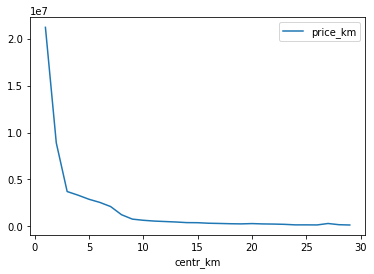

In [114]:
new.plot()

По графику можно заметить, что линия резко обрывается на значении близком к 5. Значит обозначим центр - удаленность до 5 км. 

___________

**Задача:** Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

In [115]:
#создадим таблицу, отвечающую нашим требованиям
piter_centr = piter.query('centr_km <= 5')
piter_centr.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_metr,floor_group,weekday,year,month,living_total,kitchen_total,centr_km,price_km
24,8,6500000.0,97.2,2015-10-31,2,2.5,3.0,46.5,1,False,...,265,66872.428,первый,5,2015,10,0.478395,0.201646,2,3250000.0
35,6,15500000.0,149.0,2017-06-26,5,2.5,5.0,104.0,4,False,...,644,104026.846,другой,0,2017,6,0.697987,0.114094,4,3875000.0
61,18,7990000.0,74.0,2017-08-24,2,2.5,4.0,43.0,4,False,...,609,107972.973,последний,3,2017,8,0.581081,0.270270,4,1997500.0
63,2,20000000.0,118.0,2018-09-11,3,3.0,9.0,68.0,7,False,...,37,169491.525,другой,1,2018,9,0.576271,0.135593,5,4000000.0
99,32,9600000.0,90.0,2017-09-26,4,2.5,5.0,67.0,2,False,...,104,106666.667,другой,1,2017,9,0.744444,0.088889,3,3200000.0


In [116]:
#посмотрим площадь квартир

piter_centr['total_area'].describe()

count    2480.000000
mean       95.523085
std        58.980695
min        12.000000
25%        60.000000
50%        82.000000
75%       112.000000
max       631.200000
Name: total_area, dtype: float64

In [117]:
#сравним с общей базой
data['total_area'].describe()

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

- Площадь квартир примерно одинаковая, но в центре Питера немного больше

In [118]:
#посмотрим цену

piter_centr['last_price'].describe().round()

count         2480.0
mean      14794996.0
std       26147868.0
min        1600000.0
25%        6950000.0
50%        9500000.0
75%       14200000.0
max      763000000.0
Name: last_price, dtype: float64

In [119]:
data['last_price'].describe().round()

count        23613.0
mean       6540560.0
std       10901720.0
min         121900.0
25%        3400000.0
50%        4650000.0
75%        6799000.0
max      763000000.0
Name: last_price, dtype: float64

- Цены тоже отличаются. В центре Питера почти в 2 раза выше ценник

In [120]:
#посмотрим число комнат

piter_centr['rooms'].describe()

count    2480.000000
mean        2.966935
std         1.505039
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        19.000000
Name: rooms, dtype: float64

In [121]:
data['rooms'].describe()

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

- Количество комнат практически не различается

In [122]:
#посмотрим высоту потолков

piter_centr['ceiling_height'].describe()

count    2480.000000
mean        2.928399
std         0.425262
min         2.400000
25%         2.500000
50%         2.900000
75%         3.200000
max         5.800000
Name: ceiling_height, dtype: float64

In [123]:
data['ceiling_height'].describe()

count    23613.000000
mean         2.640002
std          0.259907
min          1.000000
25%          2.500000
50%          2.500000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

- Высота потолков немного отличается. В Питере нет потолков ниже 2.4

Посмотрим, как влияют на цену число комнат, этаж, удалённость от центра, дата размещения объявления

In [124]:
piter_price_group = piter_centr[['last_price', 'floor_group', 'rooms', 'centr_km']]
piter_price_group.head()

,last_price,floor_group,rooms,centr_km
24,6500000.0,первый,2,2
35,15500000.0,другой,5,4
61,7990000.0,последний,2,4
63,20000000.0,другой,3,5
99,9600000.0,другой,4,3


In [125]:
p_group = piter_price_group.groupby('floor_group')['last_price'].median()
p_group.head()

floor_group
другой       9950000.0
первый       6950000.0
последний    9570000.0
Name: last_price, dtype: float64

<AxesSubplot:xlabel='floor_group'>

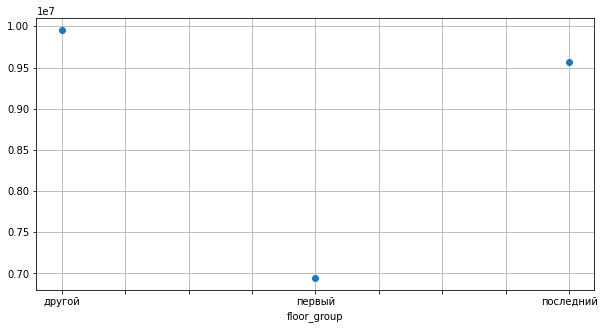

In [126]:
p_group.plot(x='floor_group', 
             y='last_price', 
             grid=True, 
             style='o', 
             figsize=(10,5),
             )

Самый высокий прайс у других этажей, средний у последний и низкий у первых. Аналогично и общей базе.

In [127]:
p_group_2 = piter_price_group.groupby('rooms')['last_price'].median()
p_group_2

rooms
0      3150000.0
1      6100000.0
2      8000000.0
3      9900000.0
4     11703236.0
5     14350000.0
6     18338500.0
7     24450000.0
8     20095000.0
9     29000000.0
10    27750000.0
11    25250000.0
14    28659000.0
15    65000000.0
16    28500000.0
19    32250000.0
Name: last_price, dtype: float64

<AxesSubplot:xlabel='rooms'>

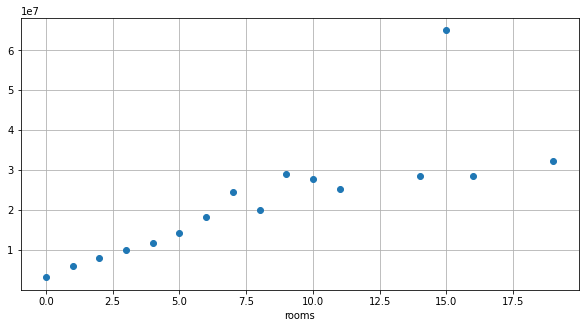

In [128]:
p_group_2.plot(x='rooms', 
             y='last_price', 
             grid=True, 
             style='o', 
             figsize=(10,5),
             )

Чем больше комнат, тем выше цена. Но на графике видны провалы, линия не строго вверх.

In [129]:
p_group_3 = piter_price_group.groupby('centr_km')['last_price'].median()
p_group_3

centr_km
0    17900000.0
1    11395000.0
2    10000000.0
3     8409000.0
4     9200000.0
5     9490000.0
Name: last_price, dtype: float64

<AxesSubplot:xlabel='centr_km'>

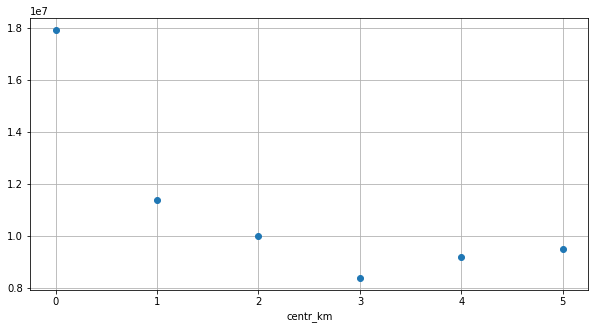

In [130]:
p_group_3.plot(x='centr_km', 
             y='last_price', 
             grid=True, 
             style='o', 
             figsize=(10,5),
             )

Вроде логично, что чем ближе к центру, тем выше цена. Но тоже есть провалы. На 3км цена ниже, чем на 4 и 5.

В целом картина такая же, как и в общей базе.

In [131]:
piter.pivot_table(index='year',
                  columns='centr_km',
                  values='last_price',
                  aggfunc='median'
                 )

centr_km,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
year,,,,,,,,,,,,,,,,,,,,,
2014,40651314.0,NaN,72169500.0,16200000.0,11364000.0,17000000.0,19845000.0,65138176.0,10568000.0,11100000.0,...,NaN,9488500.0,3390000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,27000000.0,10770000.0,11498000.0,9750000.0,10800000.0,9900000.0,10990000.0,8400000.0,8300000.0,4940000.0,...,5550000.0,4800000.0,5680000.0,4370000.0,NaN,NaN,NaN,NaN,4072000.0,NaN
2016,5550000.0,11625000.0,10500000.0,8600000.0,8750000.0,8750000.0,9200000.0,13547500.0,8223076.0,4625000.0,...,5550000.0,5430000.0,4600000.0,3250000.0,3784000.0,3150000.0,2950000.0,NaN,NaN,4535000.0
2017,13500000.0,11000000.0,9500000.0,7575000.0,8900000.0,9700000.0,9330000.0,8100000.0,7070434.0,5400000.0,...,5100000.0,4700000.0,4570000.0,4200000.0,3120000.0,4500000.0,3327500.0,14350000.0,6950000.0,4850000.0
2018,22050000.0,10200000.0,9600000.0,8700000.0,8800000.0,9200000.0,8500000.0,6900000.0,6990000.0,5542500.0,...,4900000.0,5370000.0,5180000.0,4800000.0,3610000.0,3680000.0,3366166.5,2250000.0,NaN,3325000.0
2019,33000000.0,15900000.0,10950000.0,10199000.0,9999500.0,9674500.0,8342500.0,7000000.0,8100000.0,5635000.0,...,7150000.0,4894750.0,5600000.0,5047000.0,NaN,NaN,5645000.0,NaN,NaN,4850000.0


Прослеживается логика - чем ближе к центру, тем дороже. И эта зависимость сохраняется на протяжении всех годов.

In [132]:
#второй способ поиска закономерностей
data_price_group_piter = piter[['last_price','weekday', 'month', 'year', 'centr_km']]
data_price_group_piter.head()

,last_price,weekday,month,year,centr_km
0,13000000.0,3,3,2019,16
2,5196000.0,3,8,2015,14
3,64900000.0,4,7,2015,7
4,10000000.0,1,6,2018,8
7,7915000.0,3,4,2019,12


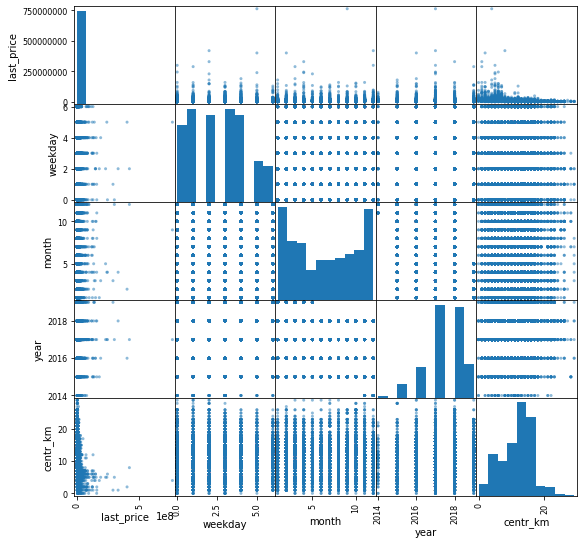

In [133]:
pd.plotting.scatter_matrix(data_price_group_piter, figsize=(9,9));

In [134]:
data_price_group_piter.corr()

,last_price,weekday,month,year,centr_km
last_price,1.000000,0.006046,-0.000022,-0.044602,-0.257570
weekday,0.006046,1.000000,0.003689,-0.001939,0.000129
month,-0.000022,0.003689,1.000000,-0.278403,0.007046
year,-0.044602,-0.001939,-0.278403,1.000000,0.085103
centr_km,-0.257570,0.000129,0.007046,0.085103,1.000000


- Напомню вывод по общей базе, правда здесь мы смотрели и другие показатели:

Зависимость цены от площади: равно 0,65. Число положительное, ближе к единице. Говорит о том, что цена зависит от площади. С ростом площади растет и цена. Зависимость цены от количества комнат: равно 0,36. Число положительное, ближе к нулю. Говорит о том, что цена зависит от количества комнат, но не сильно. С ростом количества комнат цена растет медленно. Связь слабая. Зависимость цены от удаленности от центра: равно -0,04. Число отрицательное, ближе к нулю. Говорит о том, что цена не зависит от удаленности. С увеличением удаленности от центра цена снижается, при этом практически нет взаимосвязи.

- Вывод по центру питера

**Зависимость цены от дня недели:** практически равно 0. Число положительное, но совсем близко к 0. Говорит о том, что цена не зависит от дня недели, в который опубликовано объявление о продаже. Звучит даже логично, это не имеет значения. **Зависимость цены от года продаже:** равно -0,04. Число отрицательное, ближе к нулю. Говорит о том, что цена совершенно не зависит от года продажи. Квартиры продаются всегда. **Зависимость цены от удаленности от центра:** равно -0,25. Число отрицательное, но все же ближе к нулю. Говорит о том, что цена не зависит от удаленности. С увеличением удаленности от центра цена снижается, при этом практически нет взаимосвязи. Квартиры одинаково хорошо продаются в любой удаленности в центре Питера.

Получается, что у нас с общей базой сходится один показатель: удаленность от центра. И там и там связи нет. 

In [135]:
#посмотрим, если ли закономерность в пропусках по годам (переменная data_0 была создана на момента предобработки данных)
data_0.pivot_table(index = 'month',
                  columns = 'year',
                  values = 'days_exposition',
                  aggfunc = 'count')
                           


year,2014,2015,2016,2017,2018,2019
month,,,,,,
1,NaN,70.0,122.0,289.0,592.0,423.0
2,NaN,62.0,256.0,433.0,1329.0,557.0
3,NaN,112.0,349.0,221.0,1021.0,877.0
4,NaN,50.0,418.0,638.0,303.0,953.0
5,NaN,65.0,434.0,553.0,152.0,61.0
6,NaN,95.0,460.0,668.0,529.0,NaN
7,NaN,93.0,139.0,586.0,872.0,NaN
8,NaN,92.0,88.0,738.0,823.0,NaN
9,NaN,92.0,119.0,994.0,769.0,NaN


In [136]:
data_0.loc[(data['month'] == 10) & (data['year'] == 2014)].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_metr,floor_group,weekday,year,month,living_total,kitchen_total,centr_km,price_km


Видно, что пропуски есть до ноября 2014 года и с июня 2019 года. Я проверила, что в этот период нет объявлений. Отсюда взялись и пропуски. Хотя мне кажется такую табличку нужно было создавать раньше 

## Общий вывод

Это был очень долгий проект, решение которого вышло длинное. Причина в длительной предобработке таблицы. 

Рассматривая общую базу квартир и центр Питера, можно сделать вывод: формирование стоимости квартир имеет логический однородный характер. Одинаковые показатели влияют одинаково на любую квартиру, вне зависимости от локации. 

Например, наибольшее количесво комнат увеличивают стоимоть квартир как в центре Питера, так и в любом поселке. 

На стоимость больше всего влияют: месторасположение (город, поселок), удаленность от центра, площадь, количество комнат и этаж. 